# 1. Importations et dépendance




In [ ]:

!pip install scikit-llm
!pip install setfit
!pip install wandb
!pip install optuna
!pip install --upgrade pip setuptools
!pip install transformers datasets peft bitsandbytes accelerate
!pip install --upgrade transformer



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 108.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
import random
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)
import pandas as pd
from datasets import load_dataset, concatenate_datasets

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    BitsAndBytesConfig,
    Trainer,
    TrainingArguments,
    TrainerCallback
)

from sentence_transformers.losses import CosineSimilarityLoss
from peft import (
    get_peft_model,
    LoraConfig,
    TaskType,
    AutoPeftModelForCausalLM
)
import wandb
from huggingface_hub import login
from evaluate import load
import torch


In [ ]:
# Authentification avec votre jeton Hugging Face
login(token="Token")


# 2. Initialisation et Chargement des datasets

In [ ]:
#wandb
wandb.init(project="LoRaNLI", name="sick/sick")

In [ ]:
#Chargement des Datasets

dataset_gqnli = load_dataset("maximoss/gqnli-fr")["test"]

test_dataset_rte3 = load_dataset("maximoss/rte3-french")["test"]

dataset_rte3 = load_dataset("maximoss/rte3-french")["validation"]

train_dataset_sick = load_dataset("maximoss/sick-fr-mt")["train"]
eval_dataset_sick = load_dataset("maximoss/sick-fr-mt")["validation"]
test_dataset_sick = load_dataset("maximoss/sick-fr-mt")["test"]

fracas_dataset = load_dataset("maximoss/fracas")["train"]
print(fracas_dataset)



Dataset({
    features: ['id', 'premises', 'hypothesis', 'label', 'question', 'answer', 'premises_original', 'premise1', 'premise1_original', 'premise2', 'premise2_original', 'premise3', 'premise3_original', 'premise4', 'premise4_original', 'premise5', 'premise5_original', 'hypothesis_original', 'question_original', 'note', 'topic'],
    num_rows: 346
})


# 3. Traitement des Datasets

### 3.1 Traitement sur Gqnli

In [ ]:
dataset_gqnli = dataset_gqnli .remove_columns([col for col in dataset_gqnli .column_names if col not in ['premise', 'hypothesis', 'label']])

dataset_gqnli_without_rep=dataset_gqnli.select(range(0,100))

indices0GQ = [i for i, ex in enumerate(dataset_gqnli_without_rep) if ex['label'] == 0]
print('0', len(indices0GQ))
indices1GQ = [i for i, ex in enumerate(dataset_gqnli_without_rep) if ex['label'] == 1]
print('1', len(indices1GQ))
indices2GQ = [i for i, ex in enumerate(dataset_gqnli_without_rep) if ex['label'] == 2]
print('2', len(indices2GQ))

0 32
1 33
2 35


In [ ]:
### Traitement de gqnli

k =20

contradict_dataset_gqnli = dataset_gqnli_without_rep.select(indices2GQ[ :k])
contradict_rest = dataset_gqnli_without_rep.select(indices2GQ[k :])

neutral_dataset_gqnli = dataset_gqnli_without_rep.select(indices1GQ[:k])
neutral_rest = dataset_gqnli_without_rep.select(indices1GQ[k:])

entailment_dataset_gqnli = dataset_gqnli_without_rep.select(indices0GQ[:k])

entailment_rest=dataset_gqnli_without_rep.select(indices0GQ[k:])

# Equilibrer et isoler le reste pour la validation et les testes

train_dataset_gqnli =concatenate_datasets([contradict_dataset_gqnli, neutral_dataset_gqnli, entailment_dataset_gqnli])

eval_dataset_gqnli = dataset_gqnli.select(range(100, 200))

test_dataset_gqnli= concatenate_datasets([contradict_rest,neutral_rest,entailment_rest])


#dataset_gqnli_rest=dataset_gqnli.select(range(100,len(dataset_gqnli)))

print(f"train GQNLI : {len(train_dataset_gqnli)}")
print(f"eval GQNLI : {len(eval_dataset_gqnli)}")
print(f"test GQNLI : {len(test_dataset_gqnli)}")



train GQNLI : 60
eval GQNLI : 100
test GQNLI : 40


### 3.2 Traitement sur Fracas

In [ ]:
####Traitement sur fracas

def filter_valid_labels(example):
    return example["label"] in ['0', '1', '2']
def convert_label(example):
    return {"label": int(example["label"])}


fracas_dataset = fracas_dataset.rename_column("premises", "premise")
fracas_dataset_all=fracas_dataset
fracas_dataset = fracas_dataset.filter(lambda x: x['topic'] == 'GENERALIZED QUANTIFIERS')
fracas_dataset_all = fracas_dataset_all.remove_columns([col for col in fracas_dataset.column_names if col not in ['premise', 'hypothesis', 'label']])
fracas_dataset = fracas_dataset.remove_columns([col for col in fracas_dataset.column_names if col not in ['premise', 'hypothesis', 'label']])
fracas_dataset = fracas_dataset.filter(filter_valid_labels).map(convert_label)

indices0 = [i for i, ex in enumerate(fracas_dataset) if ex['label'] == 0]
print('0',len(indices0))
indices1 = [i for i, ex in enumerate(fracas_dataset) if ex['label'] == 1]
print('1', len(indices1))
indices2 = [i for i, ex in enumerate(fracas_dataset) if ex['label'] == 2]
print('2', len(indices2))



0 37
1 32
2 5


In [ ]:
### Traitement  fracas
k = 15

contradict_dataset_f = fracas_dataset.select(indices2[:k])
contradict_rest = fracas_dataset.select(indices2[k:])

neutral_dataset = fracas_dataset.select(indices1[:k])
neutral_rest = fracas_dataset.select(indices1[k:])

entailment_dataset = fracas_dataset.select(indices0[:k])
entailment_rest = fracas_dataset.select(indices0[k:])

k_element_fracas_eq = concatenate_datasets([contradict_dataset_f, neutral_dataset, entailment_dataset])

test_dataset_fracas= concatenate_datasets([neutral_rest, entailment_rest,contradict_rest])
print(f"train fracas  : {len(k_element_fracas_eq)}")

print(f"test:fra {len(test_dataset_fracas)}")

train fracas  : 35
test:fra 39


### 3.3 Traitement sur Sick

In [ ]:
####Traitement sur sick

train_dataset_sick = load_dataset("maximoss/sick-fr-mt")["train"]
eval_dataset_sick = load_dataset("maximoss/sick-fr-mt")["validation"]
test_dataset_sick = load_dataset("maximoss/sick-fr-mt")["test"]

def encode_label(example):
    if example['entailment_label'] == 'NEUTRAL':
        example['entailment_label'] = 1
    elif example['entailment_label'] == 'CONTRADICTION':
        example['entailment_label'] = 2
    else:
        example['entailment_label'] = 0
    return example

train_dataset_sick = train_dataset_sick.map(encode_label)

eval_dataset_sick = eval_dataset_sick.map(encode_label)
test_dataset_sick = test_dataset_sick.map(encode_label)

train_dataset_sick = train_dataset_sick.remove_columns([col for col in train_dataset_sick.column_names if col not in ['sentence_A', 'sentence_B', 'entailment_label']])

test_dataset_sick = test_dataset_sick.remove_columns([col for col in test_dataset_sick.column_names if col not in ['sentence_A', 'sentence_B', 'entailment_label']])
eval_dataset_sick = eval_dataset_sick.remove_columns([col for col in eval_dataset_sick.column_names if col not in ['sentence_A', 'sentence_B', 'entailment_label']])

train_dataset_sick= train_dataset_sick.rename_column("sentence_A", "premise")
train_dataset_sick= train_dataset_sick.rename_column("sentence_B", "hypothesis")
train_dataset_sick= train_dataset_sick.rename_column("entailment_label", "label")

eval_dataset_sick= eval_dataset_sick.rename_column("sentence_A", "premise")
eval_dataset_sick= eval_dataset_sick.rename_column("sentence_B", "hypothesis")
eval_dataset_sick= eval_dataset_sick.rename_column("entailment_label", "label")

test_dataset_sick= test_dataset_sick.rename_column("sentence_A", "premise")
test_dataset_sick= test_dataset_sick.rename_column("sentence_B", "hypothesis")
test_dataset_sick= test_dataset_sick.rename_column("entailment_label", "label")

indices_e = [i for i, ex in enumerate(train_dataset_sick) if ex['label'] == 0]
print('0',len(indices_e))
indices_n = [i for i, ex in enumerate(train_dataset_sick) if ex['label'] == 1]
print('1',len(indices_n))
indices_c = [i for i, ex in enumerate(train_dataset_sick) if ex['label'] == 2]
print('2',len(indices_c))


## Les K element par classe pour les fewshot

k=20

dataset_sick= concatenate_datasets([train_dataset_sick, eval_dataset_sick, test_dataset_sick])

contradict_dataset_T = train_dataset_sick.select(indices_c[:k+10])

neutral_dataset_T = train_dataset_sick.select(indices_n[:k])

entailment_dataset_T = train_dataset_sick.select(indices_e[:k])

contradict_dataset = train_dataset_sick.select(indices_c[:30])

train_dataset_sick_equilibrer = concatenate_datasets([contradict_dataset_T, neutral_dataset_T, entailment_dataset_T])

eval_dataset_sick=eval_dataset_sick.select(range(100))

0 1274
1 2524
2 641


### 3.4. Traitement sur RT3

In [ ]:
####Traitement sur RT3
dataset_rte3  = dataset_rte3.remove_columns([col for col in dataset_rte3.column_names if col not in ['premise', 'hypothesis', 'label']])
dataset_rte3  = dataset_rte3.remove_columns([col for col in dataset_rte3.column_names if col not in ['premise', 'hypothesis', 'label']])

test_dataset_rte3=test_dataset_rte3.remove_columns([col for col in test_dataset_rte3.column_names if col not in ['premise', 'hypothesis', 'label']])

indices0 = [i for i, ex in enumerate(dataset_rte3 ) if ex['label'] == 0]
print('0', len(indices0))
indices1 = [i for i, ex in enumerate(dataset_rte3) if ex['label'] == 1]
print('1', len(indices1))
indices2 = [i for i, ex in enumerate(dataset_rte3) if ex['label'] == 2]
print('2', len(indices2))

## Les K element par classe pour les fewshot
k=40
contradict_dataset_rt3 =  dataset_rte3.select(indices2[:k])
contradict_rest_rt3 =  dataset_rte3.select(indices2[k:])

neutral_dataset_rt3 =  dataset_rte3.select(indices1[:k])
neutral_rest_rt3 =  dataset_rte3.select(indices1[k:])

entailment_dataset_rt3 =  dataset_rte3.select(indices0[:k])
entailment_rest_rt3 =  dataset_rte3.select(indices0[k:])

# Equilibrer et isoler le reste pour la validation

train_dataset_rte3=concatenate_datasets([contradict_dataset_rt3, neutral_dataset_rt3, entailment_dataset_rt3])

dataset_rt3_rest=concatenate_datasets([neutral_rest_rt3, entailment_rest_rt3,contradict_rest_rt3])

eval_dataset_rte3=dataset_rt3_rest




0 409
1 300
2 91


### 3.4 Traitement des mixs entre dataset

In [ ]:
#MIX   Train:

train_dataset_gqnli_fracas= concatenate_datasets([train_dataset_gqnli,k_element_fracas_eq ])

train_dataset_sick_farcas=concatenate_datasets([train_dataset_sick_equilibrer, k_element_fracas_eq])

train_dataset_gqnli_sick = concatenate_datasets([train_dataset_gqnli, train_dataset_sick_equilibrer])

##MIX Eval
eval_dataset_gqnli_fracas= concatenate_datasets([eval_dataset_gqnli,k_element_fracas_eq])

eval_dataset_sick_fracas= concatenate_datasets([eval_dataset_sick, k_element_fracas_eq])

eval_dataset_gqnli_sick  = concatenate_datasets([eval_dataset_sick,eval_dataset_gqnli])

eval_dataset_sick_fracas_gqnli = concatenate_datasets([eval_dataset_sick_fracas,eval_dataset_gqnli  ])

test_dataset_gqnli_sick = concatenate_datasets([test_dataset_gqnli, test_dataset_sick])

# 4. Prétraitement : Tokenisation des données avec CamemBERT

In [ ]:

model_id =  "almanach/camembertav2-base-xnli"
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
def preprocess_function(examples):
    encodings = tokenizer(examples['premise'], examples['hypothesis'],
                          padding="max_length", truncation=True)
    encodings['label'] = examples['label']
    return encodings


## 4.1 Encodage des Données Textuelles pour l’Entraînement

In [ ]:
######  TRAIN  #####################################
fracas_dataset=fracas_dataset.map(preprocess_function, batched=True)

train_dataset_sick = train_dataset_sick_equilibrer.map(preprocess_function, batched=True)

eval_dataset_sick_fracas=eval_dataset_sick_fracas.map(preprocess_function, batched=True)

train_dataset_gqnli = train_dataset_gqnli.map(preprocess_function, batched=True)

train_dataset_gqnli_fracas = train_dataset_gqnli_fracas.map(preprocess_function, batched=True)

train_dataset_rte3= train_dataset_rte3.map(preprocess_function, batched=True)

train_dataset_sick_farcas= train_dataset_sick_farcas.map(preprocess_function, batched=True)

k_element_fracas_eq= k_element_fracas_eq.map(preprocess_function, batched=True)

train_dataset_gqnli_sick = train_dataset_gqnli_sick.map(preprocess_function, batched=True)

train_dataset_sick_equilibrer = train_dataset_sick_equilibrer.map(preprocess_function, batched=True)

######  EVALUATION  ##################################
eval_dataset_sick= eval_dataset_sick.map(preprocess_function, batched=True)

eval_dataset_rte3= eval_dataset_rte3.map(preprocess_function, batched=True)

eval_dataset_sick_fracas= eval_dataset_sick_fracas.map(preprocess_function, batched=True)

eval_dataset_gqnli = eval_dataset_gqnli.map(preprocess_function, batched=True)

eval_dataset_gqnli_fracas = eval_dataset_gqnli_fracas.map(preprocess_function, batched=True)

eval_dataset_gqnli_sick = eval_dataset_gqnli_sick.map(preprocess_function, batched=True)

eval_dataset_sick_fracas_gqnli= eval_dataset_sick_fracas_gqnli.map(preprocess_function, batched=True)

######  Test   #####################################

test_dataset_gqnli = test_dataset_gqnli.map(preprocess_function, batched=True)

test_dataset_rte3=test_dataset_rte3.map(preprocess_function, batched=True)

test_dataset_fracas = test_dataset_fracas.map(preprocess_function, batched=True)

test_dataset_sick = test_dataset_sick.map(preprocess_function, batched=True)

test_dataset_gqnli_sick=test_dataset_gqnli_sick.map(preprocess_function, batched=True)

print ("train elements of GQNLI Only ",len(train_dataset_gqnli))
print ("train elements of GQNLI + Fracas  ",len(train_dataset_gqnli_fracas))
print ("train elements of SICK + Fracas ",len(train_dataset_sick_farcas))
print ("train elements of Fracas Only " ,len(k_element_fracas_eq))
print ("train elements of GQNLI + Sick ",len(train_dataset_gqnli_sick))
print ("train elements of Sick Only",len(train_dataset_sick_equilibrer))
print("train elements of Rt3 Only ",len(train_dataset_rte3))
print("eval elements of Rt3 Only ",len(eval_dataset_rte3))

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Map:   0%|          | 0/130 [00:00<?, ? examples/s]

train elements of GQNLI Only  60
train elements of GQNLI + Fracas   95
train elements of SICK + Fracas  105
train elements of Fracas Only  35
train elements of GQNLI + Sick  130
train elements of Sick Only 70
train elements of Rt3 Only  120
eval elements of Rt3 Only  680


# 5. Fine-Tuning avec LoRA : Configuration et Boucle d’Entraînement

## 5.1 Configuration de Lora

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=3,
    device_map="auto"
)
lora_config = LoraConfig(
    r=32,
    lora_alpha=256,
    target_modules=["query_proj", "value_proj"],
    lora_dropout=0.05,
    task_type=TaskType.SEQ_CLS,
)

lora_model = get_peft_model(model, lora_config)
lora_model.print_trainable_parameters()



trainable params: 1,181,955 || all params: 112,391,430 || trainable%: 1.0516


## 5.2 Entrainement

In [ ]:
# entrainement

class TestEvalCallback(TrainerCallback):
    def __init__(self, test_dataset, trainer=None):
        self.test_dataset = test_dataset
        self.trainer = trainer

    def on_epoch_end(self, args, state, control, **kwargs):
        if self.trainer is None:
            print("Trainer non défini dans callback, skipping test evaluation.")
            return


        predictions = self.trainer.predict(self.test_dataset)
        preds = np.argmax(predictions.predictions, axis=1)
        labels = predictions.label_ids

        acc = accuracy_score(labels, preds)
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

        if wandb.run:
            wandb.log({
                "epoch": state.epoch,
                "test/accuracy": acc,
                "test/f1": f1,
                "test/precision": precision,
                "test/recall": recall
            })

def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

args = TrainingArguments(
    eval_on_start = True ,
    output_dir="./results",
    eval_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    save_steps=150,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    load_best_model_at_end=True,
   # learning_rate=5e-6
    report_to="wandb",
)

trainer = Trainer(
    model=lora_model,
    args=args,
    train_dataset= train_dataset_sick,
    eval_dataset=eval_dataset_sick,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics ,

)

test_callback = TestEvalCallback(test_dataset=test_dataset_sick, trainer=trainer)
trainer.add_callback(test_callback)

trainer.train()



<ipython-input-598-edc75ed6fc07>:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,No log,1.640833,0.550000,0.562536,0.618855,0.732527
1,No log,1.375010,0.590000,0.597129,0.633635,0.754032
2,0.404700,1.174201,0.620000,0.623199,0.638778,0.753136
3,0.404700,1.047652,0.650000,0.649060,0.656990,0.769265
4,0.259700,1.002631,0.660000,0.660764,0.664021,0.783154
5,0.259700,0.950954,0.690000,0.686015,0.678655,0.799283
6,0.212400,0.905388,0.700000,0.694603,0.683929,0.804659
7,0.212400,0.878676,0.710000,0.703300,0.689446,0.810036
8,0.148500,0.871512,0.720000,0.713388,0.700250,0.823925
9,0.148500,0.852018,0.720000,0.713388,0.700250,0.823925


TrainOutput(global_step=100, training_loss=0.17073452591896057, metrics={'train_runtime': 358.0814, 'train_samples_per_second': 3.91, 'train_steps_per_second': 0.279, 'total_flos': 32607993751920.0, 'train_loss': 0.17073452591896057, 'epoch': 20.0})

# 6. Testes et Analyses

## 6.1 Test sur FRACAS




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Évaluation sur le jeu de test :
Accuracy  : 0.6667
F1 Score  : 0.4164
Recall    : 0.4207
Precision : 0.4722


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(70.72222222222221, 0.5, 'Véritables')

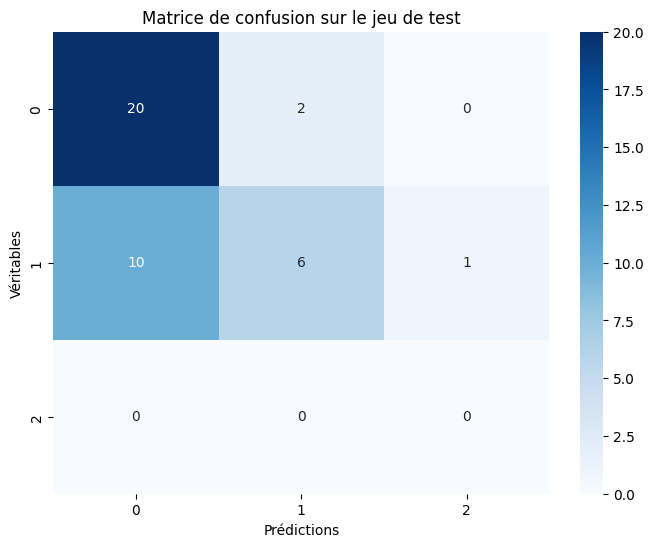

In [ ]:
#test sur fracas

predictions = trainer.predict(test_dataset_fracas)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids


acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")

## 6.2 Test sur SICK


Évaluation sur le jeu de test :
Accuracy  : 0.7097
F1 Score  : 0.7027
Recall    : 0.7946
Precision : 0.7024


Text(70.72222222222221, 0.5, 'Véritables')

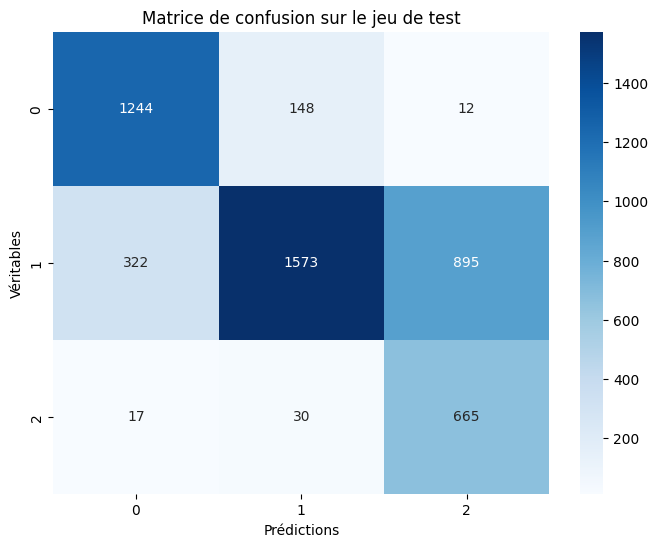

In [ ]:
#test sur sick
predictions = trainer.predict(test_dataset_sick)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")

## 6.3 Test sur GQNLI

 TestQNLI: 55



Évaluation sur le jeu de test :
Accuracy  : 0.2909
F1 Score  : 0.2732
Recall    : 0.2874
Precision : 0.2745


Text(70.72222222222221, 0.5, 'Véritables')

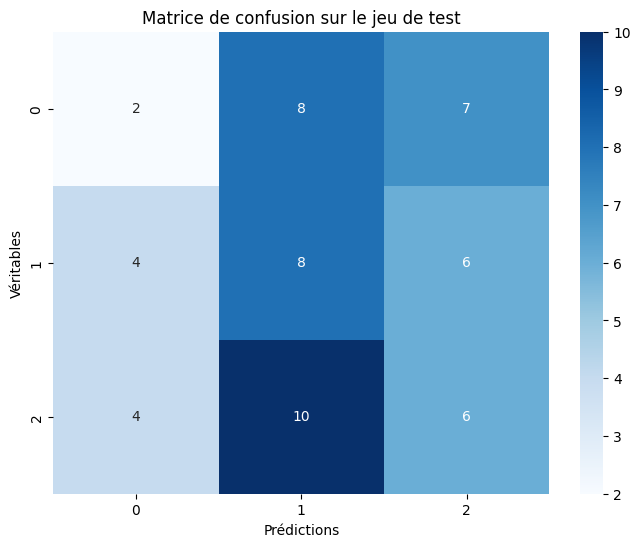

In [ ]:
#test sur gqnli
print(f" TestQNLI: {len(test_dataset_gqnli)}")
predictions = trainer.predict(test_dataset_gqnli)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")

## 6.4 Test sur RT3

Testrte3: 800


Map:   0%|          | 0/800 [00:00<?, ? examples/s]


Évaluation sur le jeu de test :
Accuracy  : 0.6425
F1 Score  : 0.5705
Recall    : 0.5736
Precision : 0.5909


Text(70.72222222222221, 0.5, 'Véritables')

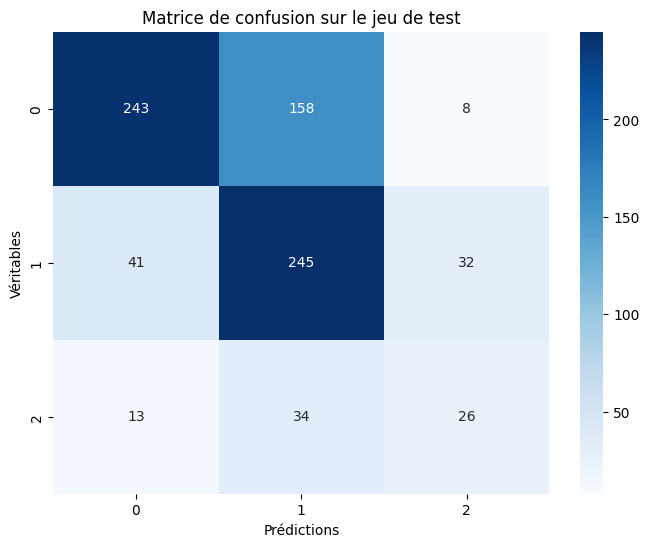

In [ ]:
#test rt3
print(f"Testrte3: {len(test_dataset_rte3)}")
test_dataset_rt3=test_dataset_rte3.map(preprocess_function, batched=True)
predictions = trainer.predict(test_dataset_rt3)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")

##6.5 Test Finale pour Wandb

In [ ]:
#test finale pour Wandb
predictions = trainer.predict(test_dataset_gqnli)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

wandb.log({
    "test/accuracy": acc,
    "test/f1": f1,
    "test/precision": precision,
    "test/recall": recall
})

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
wandb.log({"confusion_matrix_test": wandb.Image(plt)})
plt.close()

# Fermer wandb
wandb.finish()



Évaluation sur le jeu de test :
Accuracy  : 0.2909
F1 Score  : 0.2732
Recall    : 0.2874
Precision : 0.2745


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
eval/accuracy,▁▂▄▅▆▆▆▆▆▇▇▇█████████
eval/f1,▁▂▄▅▆▅▆▆▆▆▇▇█████████
eval/loss,█▅▄▂▂▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂
eval/precision,▁▂▃▅▆▅▆▆▆▇▆▇█████████
eval/recall,▁▂▃▄▅▅▅▅▆▆▆▇█████████
eval/runtime,▂▁▃▅█▄▃▄▅▆▅▆▆▅▄▅▆▅▄▅▅
eval/samples_per_second,▇█▆▄▁▅▆▅▄▃▄▃▃▄▅▄▃▄▅▄▄
eval/steps_per_second,▇█▆▄▁▅▆▅▄▃▄▃▃▄▅▄▃▄▅▄▄
test/accuracy,▇▇▇▇▇▇███████████████████████████████▁█▁
test/f1,▇▇▇▇▇▇█████████████████████████████▄█▁▆▁


#7. Sauvegarde du modèle LoRA fine-tuné

In [ ]:
model.save_pretrained("./camembert_lora_nli")

#8. Modèle pour l’inférence textuelle a deux étiquette


In [ ]:
#LoRaBI
wandb.init(project="LoRaBI", name="Rte3/Rte3")

## 8.1 Traitement des données

###DACCORD

In [ ]:

dataset_daccord = load_dataset("maximoss/daccord-contradictions")["train"]

print(dataset_daccord)

dataset_daccord = dataset_daccord.remove_columns([col for col in dataset_daccord.column_names if col not in ['premise', 'hypothesis', 'label']])

indices0DC = [i for i, ex in enumerate(dataset_daccord) if ex['label'] == 0]
indices1DC = [i for i, ex in enumerate(dataset_daccord) if ex['label'] == 1]
k=40

contradict_dataset_DC = dataset_daccord.select(indices0DC[:k])
contradict_dataset_DC_rest = dataset_daccord.select(indices0DC[k:])

neutral_dataset_DC = dataset_daccord.select(indices1DC[:k])
neutral_dataset_DC_rest = dataset_daccord.select(indices1DC[k:])

train_dataset_daccord= concatenate_datasets([contradict_dataset_DC , neutral_dataset_DC ])
test_dataset_daccord= concatenate_datasets([contradict_dataset_DC_rest, neutral_dataset_DC_rest]).select(range(400))
eval_dataset_daccord=concatenate_datasets([contradict_dataset_DC_rest, neutral_dataset_DC_rest]).select(range(400,800))



Dataset({
    features: ['id', 'premise', 'hypothesis', 'label', 'label_text', 'url', 'genre'],
    num_rows: 1034
})


### SICK BI

In [ ]:
####Traitement sur sick_bi

train_dataset_sick = load_dataset("maximoss/sick-fr-mt")["train"]
eval_dataset_sick = load_dataset("maximoss/sick-fr-mt")["validation"]
test_dataset_sick = load_dataset("maximoss/sick-fr-mt")["test"]

def encode_label(example):
    if example['entailment_label'] == 'NEUTRAL':
        example['entailment_label'] = 0
    elif example['entailment_label'] == 'CONTRADICTION':
        example['entailment_label'] = 1
    else:
        example['entailment_label'] = 0
    return example

train_dataset_sick = train_dataset_sick.map(encode_label)
eval_dataset_sick = eval_dataset_sick.map(encode_label)
test_dataset_sick = test_dataset_sick.map(encode_label)

train_dataset_sick = train_dataset_sick.remove_columns([col for col in train_dataset_sick.column_names if col not in ['sentence_A', 'sentence_B', 'entailment_label']])

test_dataset_sick = test_dataset_sick.remove_columns([col for col in test_dataset_sick.column_names if col not in ['sentence_A', 'sentence_B', 'entailment_label']])
eval_dataset_sick = eval_dataset_sick.remove_columns([col for col in eval_dataset_sick.column_names if col not in ['sentence_A', 'sentence_B', 'entailment_label']])

train_dataset_sick= train_dataset_sick.rename_column("sentence_A", "premise")
train_dataset_sick= train_dataset_sick.rename_column("sentence_B", "hypothesis")
train_dataset_sick= train_dataset_sick.rename_column("entailment_label", "label")

eval_dataset_sick= eval_dataset_sick.rename_column("sentence_A", "premise")
eval_dataset_sick= eval_dataset_sick.rename_column("sentence_B", "hypothesis")
eval_dataset_sick= eval_dataset_sick.rename_column("entailment_label", "label")

test_dataset_sick= test_dataset_sick.rename_column("sentence_A", "premise")
test_dataset_sick= test_dataset_sick.rename_column("sentence_B", "hypothesis")
test_dataset_sick= test_dataset_sick.rename_column("entailment_label", "label")

test_dataset_sick_bi=test_dataset_sick

indices_NB = [i for i, ex in enumerate(train_dataset_sick) if ex['label'] == 0]
indices_CB = [i for i, ex in enumerate(train_dataset_sick) if ex['label'] == 1]


eval_dataset_sick_bi = eval_dataset_sick.select(range(400))

## Les K element par classe pour les fewshot
k=40

contradict_dataset_T = train_dataset_sick.select(indices_CB[:k])

neutral_dataset_T = train_dataset_sick.select(indices_NB[:k])

train_dataset_sick_bi = concatenate_datasets([contradict_dataset_T, neutral_dataset_T])


### RTE3 BI

In [ ]:
def encode_label(example):
    example['label'] = 1 if example['label'] == 2 else 0
    return example

test_dataset_rte3_bi = load_dataset("maximoss/rte3-french")["test"]
dataset_rte3_bi = load_dataset("maximoss/rte3-french")["validation"]

dataset_rte3_bi = dataset_rte3_bi.map(encode_label)
test_dataset_rte3_bi = test_dataset_rte3_bi.map(encode_label)

columns_to_keep = ['premise', 'hypothesis', 'label']
dataset_rte3_bi = dataset_rte3_bi.remove_columns([col for col in dataset_rte3_bi.column_names if col not in columns_to_keep])
test_dataset_rte3_bi = test_dataset_rte3_bi.remove_columns([col for col in test_dataset_rte3_bi.column_names if col not in columns_to_keep])

indices_label_0 = [i for i, ex in enumerate(dataset_rte3_bi) if ex['label'] == 0]
indices_label_1 = [i for i, ex in enumerate(dataset_rte3_bi) if ex['label'] == 1]

## Les K element par classe pour les fewshot
k = 40

neutral_train = dataset_rte3_bi.select(indices_label_0[:k])
contradict_train = dataset_rte3_bi.select(indices_label_1[:k])

neutral_eval = dataset_rte3_bi.select(indices_label_0[k:])
contradict_eval = dataset_rte3_bi.select(indices_label_1[k:])

train_dataset_rte3_bi = concatenate_datasets([neutral_train, contradict_train]).shuffle(seed=42)
eval_dataset_rte3_bi = concatenate_datasets([neutral_eval, contradict_eval]).shuffle(seed=42)


##8.2 Entrainement et configuration

In [ ]:
#tokenizer
model_id =  "almanach/camembertav2-base-xnli"
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
def preprocess_function(examples):
    encodings = tokenizer(examples['premise'], examples['hypothesis'], padding="max_length", truncation=True)
    encodings['label'] = examples['label']
    return encodings


model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    device_map="auto"
)

#entrainement
lora_config = LoraConfig(
    r=32,
    lora_alpha=256,
    target_modules=["query_proj", "value_proj"],
    lora_dropout=0.05,
    task_type=TaskType.SEQ_CLS,
)

lora_model = get_peft_model(model, lora_config)
lora_model.print_trainable_parameters()

trainable params: 1,181,955 || all params: 112,391,430 || trainable%: 1.0516


In [ ]:
test_dataset_daccord = test_dataset_daccord.map(preprocess_function, batched=True)
train_dataset_daccord = train_dataset_daccord.map(preprocess_function, batched=True)
eval_dataset_daccord = eval_dataset_daccord.map(preprocess_function, batched=True)

train_dataset_sick_bi=train_dataset_sick_bi.map(preprocess_function, batched=True)
eval_dataset_sick_bi = eval_dataset_sick_bi.map(preprocess_function, batched=True)
test_dataset_sick_bi=test_dataset_sick_bi.map(preprocess_function, batched=True)

train_dataset_rte3_bi=train_dataset_rte3_bi.map(preprocess_function, batched=True)
eval_dataset_rte3_bi = eval_dataset_rte3_bi.map(preprocess_function, batched=True)
test_dataset_rte3_bi=test_dataset_rte3_bi.map(preprocess_function, batched=True)

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:

class TestEvalCallback(TrainerCallback):
    def __init__(self, test_dataset, trainer=None):
        self.test_dataset = test_dataset
        self.trainer = trainer

    def on_epoch_end(self, args, state, control, **kwargs):
        if self.trainer is None:
            print("Trainer non défini dans callback, skipping test evaluation.")
            return

        predictions = self.trainer.predict(self.test_dataset)
        preds = np.argmax(predictions.predictions, axis=1)
        labels = predictions.label_ids

        acc = accuracy_score(labels, preds)
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
        if wandb.run:
            wandb.log({
                "epoch": state.epoch,
                "test/accuracy": acc,
                "test/f1": f1,
                "test/precision": precision,
                "test/recall": recall
            })

def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

args = TrainingArguments(
    #eval_on_start = True ,
    output_dir="./results",
    eval_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    save_steps=150,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    load_best_model_at_end=True,
    #learning_rate=5e-6,
    report_to="wandb",
)

trainer = Trainer(
    model=lora_model,
    args=args,
    train_dataset=train_dataset_rte3_bi  ,
    eval_dataset= eval_dataset_rte3_bi,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics ,

)

test_callback = TestEvalCallback(test_dataset=test_dataset_rte3_bi, trainer=trainer)
trainer.add_callback(test_callback)

trainer.train()



<ipython-input-273-ccbf54bb22a5>:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.637463,0.565278,0.271553,0.335332,0.281280
2,1.104900,1.618496,0.545833,0.268922,0.336907,0.298455
3,1.104900,1.613155,0.525000,0.266764,0.339994,0.321170
4,0.724900,1.559063,0.516667,0.266352,0.341405,0.336294
5,0.724900,1.479343,0.534722,0.276454,0.345277,0.360884
6,0.561400,1.418055,0.543056,0.281592,0.347442,0.375949
7,0.561400,1.401838,0.541667,0.282073,0.348081,0.381488
8,0.517000,1.414339,0.533333,0.278736,0.347287,0.378499
9,0.517000,1.409254,0.536111,0.279848,0.347551,0.379495
10,0.432800,1.418471,0.538889,0.280961,0.347815,0.380492


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

TrainOutput(global_step=100, training_loss=0.49394729375839236, metrics={'train_runtime': 312.6845, 'train_samples_per_second': 5.117, 'train_steps_per_second': 0.32, 'total_flos': 90127852865280.0, 'train_loss': 0.49394729375839236, 'epoch': 20.0})

## 8.3 Testes

In [ ]:
#test finale pour Wandb

predictions = trainer.predict(test_dataset_sick_bi)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

wandb.log({
    "test/accuracy": acc,
    "test/f1": f1,
    "test/precision": precision,
    "test/recall": recall
})

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
wandb.log({"confusion_matrix_test": wandb.Image(plt)})
plt.close()

# Fermer wandb
wandb.finish()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Évaluation sur le jeu de test :
Accuracy  : 0.8388
F1 Score  : 0.5099
Recall    : 0.5832
Precision : 0.4884


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
eval/accuracy,▁▂▃▄▆▇▆▆▆▇██████████
eval/f1,▁▁▂▂▅▆▆▆▇▇██████████
eval/loss,█▆▄▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
eval/precision,▁▁▁▁▅▆▆▆▆▇██████████
eval/recall,▁▁▂▂▅▆▆▇▇███████████
eval/runtime,█▅▁▁▃▃▄▂▃▃▃▃▂▂▃▃▃▁▃▃
eval/samples_per_second,▁▄██▆▆▅▇▆▆▆▆▇▇▆▆▆█▆▆
eval/steps_per_second,▁▄██▆▆▅▇▆▆▆▆▇▇▆▆▆█▆▆
test/accuracy,▁▁▂▂▃▃▄▄▆▆▇▇▆▆▆▆▆▆▇▇████████████████████
test/f1,▁▁▁▁▂▂▃▃▅▅▆▆▆▆▆▆▇▇▇▇████████████████████


In [ ]:
#test finale pour Wandb

predictions = trainer.predict(test_dataset_daccord)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

wandb.log({
    "test/accuracy": acc,
    "test/f1": f1,
    "test/precision": precision,
    "test/recall": recall
})

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,  fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
wandb.log({"confusion_matrix_test": wandb.Image(plt)})
plt.close()

# # Fermer wandb
wandb.finish()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Évaluation sur le jeu de test :
Accuracy  : 0.7000
F1 Score  : 0.4118
Recall    : 0.3500
Precision : 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
eval/accuracy,▁▂▃▄▅▅▆▇▇███████████
eval/f1,▁▃▃▄▅▅▆▆▇▇▇▇████████
eval/loss,█▆▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/precision,▄▅▁▃▅▅▃▄▅▆▆▇▇▇██▇███
eval/recall,▁▂▃▅▇▇▆▆▇▇▇▇████████
eval/runtime,▂▅█▆▄▂▁▁▁▃▄▅▄▃▃▂▂▃▂▃
eval/samples_per_second,▇▃▁▃▅▇██▇▆▅▄▅▆▆▇▇▆▇▆
eval/steps_per_second,▇▃▁▃▅▇██▇▆▅▄▅▆▆▇▇▆▇▆
test/accuracy,▁▁▃▃▅▅▇▇████▇▇▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆
test/f1,▁▁▂▂▃▃▃▃▃▃▃▃▃▃▃▃████████████████████████


In [ ]:

predictions = trainer.predict(test_dataset_rte3_bi)
preds = predictions.predictions.argmax(axis=1)
labels = predictions.label_ids

acc = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

print(f"\nÉvaluation sur le jeu de test :")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

wandb.log({
    "test/accuracy": acc,
    "test/f1": f1,
    "test/precision": precision,
    "test/recall": recall
})

# Matrice de confusion
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion sur le jeu de test")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
wandb.log({"confusion_matrix_test": wandb.Image(plt)})
plt.close()

# Fermer wandb
wandb.finish()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Évaluation sur le jeu de test :
Accuracy  : 0.5975
F1 Score  : 0.3055
Recall    : 0.3629
Precision : 0.3471


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
eval/accuracy,█▅▂▁▄▅▅▄▄▄▃▁▂▂▂▂▂▂▂▂
eval/f1,▃▂▁▁▅██▇▇█▆▃▄▄▄▄▄▄▄▄
eval/loss,▇▇▆▅▃▁▁▁▁▁▃▅▅▆▆▇▇███
eval/precision,▁▂▄▄▆█████▇▇▇▇▇▇▇▇▇▇
eval/recall,▁▂▄▅▇██████▇██▇▇▇▇██
eval/runtime,▇█▄▁▁▂▄▄▃▃▂▂▂▂▃▃▃▄▃▃
eval/samples_per_second,▂▁▅██▇▅▅▆▆▇▇▇▇▆▅▆▅▆▆
eval/steps_per_second,▂▁▅██▇▅▅▆▆▇▇▇▇▆▅▆▅▆▆
test/accuracy,▇▇▄▄▁▁▁▁▃▃▅▅▆▆▅▅▆▆██▅▂▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▆
test/f1,▁▁▁▁▂▂▃▃▅▅▆▆▇▇▇▇▇▇██▆▆▆▆▆▆▆▆▆▇▇▇▇▆▆▆▆▆▆▇


#9. Pré-évaluation des jeux de données sur le modèle préentraîné CamemBERTaV2-base-XNLI

##9.1 FRACAS

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base-xnli")
nli_model = AutoModelForSequenceClassification.from_pretrained("almanach/camembertav2-base-xnli")

output_path = './output.txt'
w = open(output_path, 'w')
probs_all = []
corpus =  fracas_dataset.to_pandas()
for index, row in corpus.iterrows():
    premise = row['premise']
    hypothesis = row['hypothesis']
    inputs = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    with torch.no_grad():
        logits = nli_model(inputs)[0]
    probs = logits.softmax(dim=1)
    prob_entailment = probs[:, 0].item()
    prob_neutral = probs[:, 1].item()
    prob_contradiction = probs[:, 2].item()
    prediction = torch.argmax(probs, dim=1).item()
    if row['label'] == 0:
        gold = 0
    elif row['label'] == 1:
        gold = 1
    else:
        gold = 2
    probs_all.append((index, gold, prediction))

res = pd.DataFrame(probs_all, columns=['id', 'gold_label', 'prediction'])
w.writelines(str(line) + '\n' for line in probs_all)
w.close()

labels_test = res['gold_label']
preds_test = res['prediction']

f1_metric = load("f1")
accuracy_metric = load("accuracy")

results_accuracy = accuracy_metric.compute(predictions=preds_test, references=labels_test)
results_f1 = f1_metric.compute(predictions=preds_test, references=labels_test, average='macro')

print("Accuracy:", results_accuracy)
print("F1 Score:", results_f1)


Accuracy: {'accuracy': 0.6621621621621622}
F1 Score: {'f1': 0.6325385694249649}


## 9.2 GQNLI

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base-xnli")
nli_model = AutoModelForSequenceClassification.from_pretrained("almanach/camembertav2-base-xnli")

output_path = './output.txt'
w = open(output_path, 'w')
probs_all = []
corpus =  dataset_gqnli.to_pandas()
#print(corpus.head())
for index, row in corpus.iterrows():
    premise = row['premise']
    hypothesis = row['hypothesis']
    inputs = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    with torch.no_grad():
        logits = nli_model(inputs)[0]
    probs = logits.softmax(dim=1)
    prob_entailment = probs[:, 0].item()
    prob_neutral = probs[:, 1].item()
    prob_contradiction = probs[:, 2].item()
    prediction = torch.argmax(probs, dim=1).item()
    if row['label'] == 0:
        gold = 0
    elif row['label'] == 1:
        gold = 1
    else:
        gold = 2
    probs_all.append((index, gold, prediction))

res = pd.DataFrame(probs_all, columns=['id', 'gold_label', 'prediction'])
w.writelines(str(line) + '\n' for line in probs_all)
w.close()

labels_test = res['gold_label']
preds_test = res['prediction']

f1_metric = load("f1")
accuracy_metric = load("accuracy")

results_accuracy = accuracy_metric.compute(predictions=preds_test, references=labels_test)
results_f1 = f1_metric.compute(predictions=preds_test, references=labels_test, average='macro')

print("Accuracy:", results_accuracy)
print("F1 Score:", results_f1)

Accuracy: {'accuracy': 0.2733333333333333}
F1 Score: {'f1': 0.2483800128883352}


## 9.3 SICK

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base-xnli")
nli_model = AutoModelForSequenceClassification.from_pretrained("almanach/camembertav2-base-xnli")

output_path = './output.txt'
w = open(output_path, 'w')
probs_all = []
corpus = test_dataset_sick.to_pandas()
#print(corpus.head())
for index, row in corpus.iterrows():
    premise = row['premise']
    hypothesis = row['hypothesis']
    inputs = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    with torch.no_grad():
        logits = nli_model(inputs)[0]
    probs = logits.softmax(dim=1)
    prob_entailment = probs[:, 0].item()
    prob_neutral = probs[:, 1].item()
    prob_contradiction = probs[:, 2].item()
    prediction = torch.argmax(probs, dim=1).item()
    if row['label'] == 0:
        gold = 0
    elif row['label'] == 1:
        gold = 1
    else:
        gold = 2
    probs_all.append((index, gold, prediction))

res = pd.DataFrame(probs_all, columns=['id', 'gold_label', 'prediction'])
w.writelines(str(line) + '\n' for line in probs_all)
w.close()

labels_test = res['gold_label']
preds_test = res['prediction']

f1_metric = load("f1")
accuracy_metric = load("accuracy")

results_accuracy = accuracy_metric.compute(predictions=preds_test, references=labels_test)
results_f1 = f1_metric.compute(predictions=preds_test, references=labels_test, average='macro')

print("Accuracy:", results_accuracy)
print("F1 Score:", results_f1)

Accuracy: {'accuracy': 0.5617611088463106}
F1 Score: {'f1': 0.5664739726417707}


###Sick BI

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base-xnli")
nli_model = AutoModelForSequenceClassification.from_pretrained("almanach/camembertav2-base-xnli")

output_path = './output.txt'
w = open(output_path, 'w')
probs_all = []
corpus = test_dataset_sick_bi.to_pandas()
#print(corpus.head())
for index, row in corpus.iterrows():
    premise = row['premise']
    hypothesis = row['hypothesis']
    inputs = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    with torch.no_grad():
        logits = nli_model(inputs)[0]
    probs = logits.softmax(dim=1)
    prob_neutral = probs[:, 0].item()
    prob_contradiction = probs[:, 1].item()
    prediction = torch.argmax(probs, dim=1).item()
    if row['label'] == 0:
        gold = 0
    else:
        gold = 1

    probs_all.append((index, gold, prediction))

res = pd.DataFrame(probs_all, columns=['id', 'gold_label', 'prediction'])
w.writelines(str(line) + '\n' for line in probs_all)
w.close()

labels_test = res['gold_label']
preds_test = res['prediction']

f1_metric = load("f1")
accuracy_metric = load("accuracy")

results_accuracy = accuracy_metric.compute(predictions=preds_test, references=labels_test)
results_f1 = f1_metric.compute(predictions=preds_test, references=labels_test, average='macro')

print("Accuracy:", results_accuracy)
print("F1 Score:", results_f1)

Accuracy: {'accuracy': 0.3603750509580106}
F1 Score: {'f1': 0.20010476636091776}


## 9.4 RT3

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base-xnli")
nli_model = AutoModelForSequenceClassification.from_pretrained("almanach/camembertav2-base-xnli")

output_path = './output.txt'
w = open(output_path, 'w')
probs_all = []
corpus =  test_dataset_rte3.to_pandas()
#print(corpus.head())
for index, row in corpus.iterrows():
    premise = row['premise']
    hypothesis = row['hypothesis']
    inputs = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    with torch.no_grad():
        logits = nli_model(inputs)[0]
    probs = logits.softmax(dim=1)
    prob_entailment = probs[:, 0].item()
    prob_neutral = probs[:, 1].item()
    prob_contradiction = probs[:, 2].item()
    prediction = torch.argmax(probs, dim=1).item()
    if row['label'] == 0:
        gold = 0
    elif row['label'] == 1:
        gold = 1
    else:
        gold = 2
    probs_all.append((index, gold, prediction))

res = pd.DataFrame(probs_all, columns=['id', 'gold_label', 'prediction'])
w.writelines(str(line) + '\n' for line in probs_all)
w.close()

labels_test = res['gold_label']
preds_test = res['prediction']

f1_metric = load("f1")
accuracy_metric = load("accuracy")

results_accuracy = accuracy_metric.compute(predictions=preds_test, references=labels_test)
results_f1 = f1_metric.compute(predictions=preds_test, references=labels_test, average='macro')

print("Accuracy:", results_accuracy)
print("F1 Score:", results_f1)


Accuracy: {'accuracy': 0.66625}
F1 Score: {'f1': 0.5653099663122269}


###Rte 3 BI

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base-xnli")
nli_model = AutoModelForSequenceClassification.from_pretrained("almanach/camembertav2-base-xnli")

output_path = './output.txt'
w = open(output_path, 'w')
probs_all = []
corpus = test_dataset_rte3_bi.to_pandas()
#print(corpus.head())
for index, row in corpus.iterrows():
    premise = row['premise']
    hypothesis = row['hypothesis']
    inputs = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    with torch.no_grad():
        logits = nli_model(inputs)[0]
    probs = logits.softmax(dim=1)
    prob_neutral = probs[:, 0].item()
    prob_contradiction = probs[:, 1].item()
    prediction = torch.argmax(probs, dim=1).item()
    if row['label'] == 0:
        gold = 0
    else:
        gold = 1

    probs_all.append((index, gold, prediction))

res = pd.DataFrame(probs_all, columns=['id', 'gold_label', 'prediction'])
w.writelines(str(line) + '\n' for line in probs_all)
w.close()

labels_test = res['gold_label']
preds_test = res['prediction']

f1_metric = load("f1")
accuracy_metric = load("accuracy")

results_accuracy = accuracy_metric.compute(predictions=preds_test, references=labels_test)
results_f1 = f1_metric.compute(predictions=preds_test, references=labels_test, average='macro')

print("Accuracy:", results_accuracy)
print("F1 Score:", results_f1)

Accuracy: {'accuracy': 0.5925}
F1 Score: {'f1': 0.2762564796033356}


##9.5 DACCORD

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base-xnli")
nli_model = AutoModelForSequenceClassification.from_pretrained("almanach/camembertav2-base-xnli")

output_path = './output.txt'
w = open(output_path, 'w')
probs_all = []
corpus = test_dataset_daccord.to_pandas()
#print(corpus.head())
for index, row in corpus.iterrows():
    premise = row['premise']
    hypothesis = row['hypothesis']
    inputs = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    with torch.no_grad():
        logits = nli_model(inputs)[0]
    probs = logits.softmax(dim=1)
    prob_neutral = probs[:, 0].item()
    prob_contradiction = probs[:, 1].item()
    prediction = torch.argmax(probs, dim=1).item()
    if row['label'] == 0:
        gold = 0
    else:
        gold = 1

    probs_all.append((index, gold, prediction))

res = pd.DataFrame(probs_all, columns=['id', 'gold_label', 'prediction'])
w.writelines(str(line) + '\n' for line in probs_all)
w.close()

labels_test = res['gold_label']
preds_test = res['prediction']

f1_metric = load("f1")
accuracy_metric = load("accuracy")

results_accuracy = accuracy_metric.compute(predictions=preds_test, references=labels_test)
results_f1 = f1_metric.compute(predictions=preds_test, references=labels_test, average='macro')

print("Accuracy:", results_accuracy)
print("F1 Score:", results_f1)

Accuracy: {'accuracy': 0.46}
F1 Score: {'f1': 0.2100456621004566}
